In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# Mendefinisikan direktori utama dataset
#dataset ini upload terlebih dulu ke drive agar bisa di load di google colab,
#atau kalian bisa langsung download lewat kaggle langsung di google colab

import os
base_dir =( '/content/drive/My Drive/1207070068_Moh Rido Fauzi A_P11/CNN/flowers')


In [ ]:
print(os.listdir(base_dir))

['tulip', 'rose', 'dandelion', 'sunflower', 'daisy']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


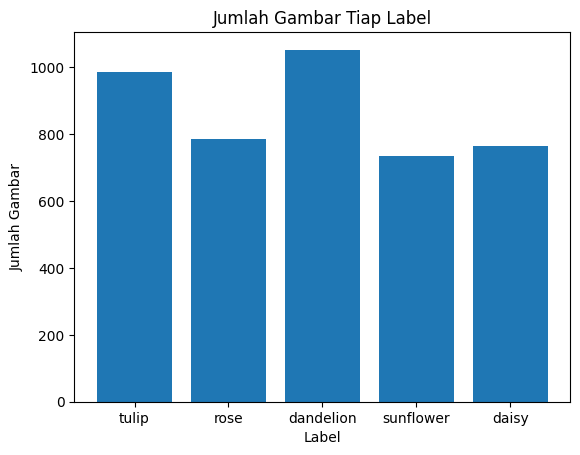

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

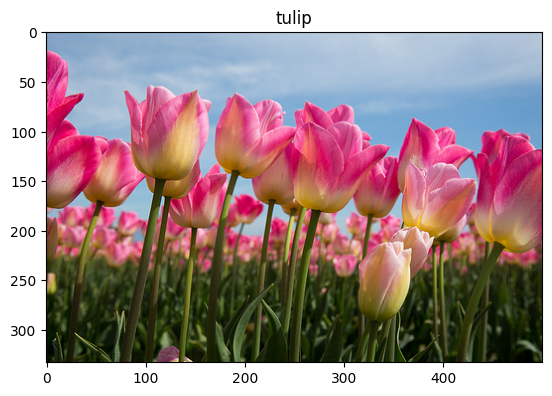

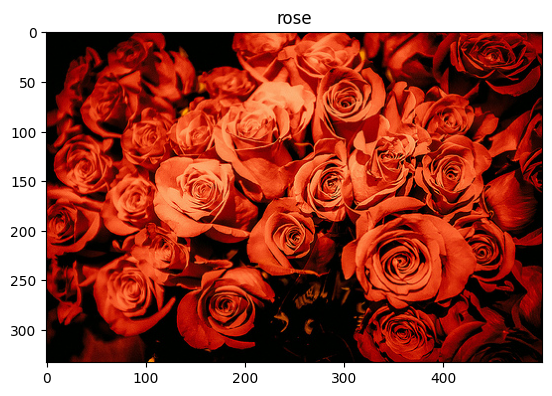

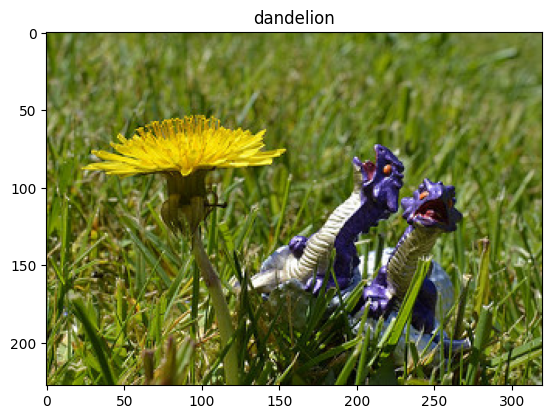

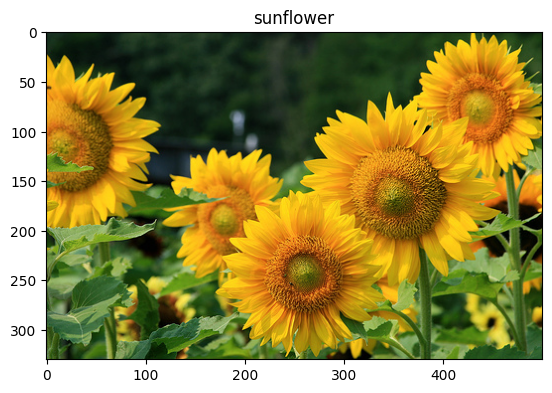

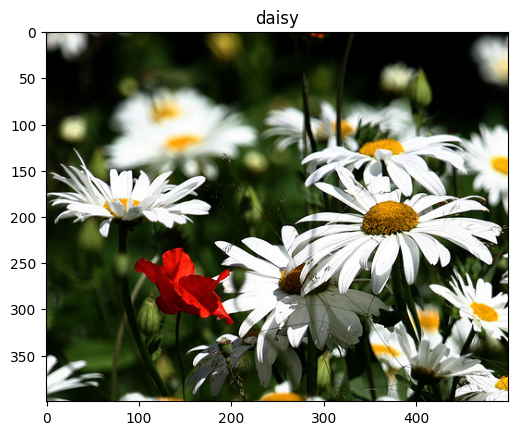

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

In [ ]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [ ]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

In [ ]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 1005s 9s/step - loss: 1.2946 - accuracy: 0.4359 - val_loss: 1.1769 - val_accuracy: 0.5116
Epoch 2/20
109/109 [==============================] - 22s 204ms/step - loss: 1.0689 - accuracy: 0.5600 - val_loss: 1.2296 - val_accuracy: 0.5372
Epoch 3/20
109/109 [==============================] - 21s 193ms/step - loss: 0.9694 - accuracy: 0.6179 - val_loss: 1.0088 - val_accuracy: 0.6140
Epoch 4/20
109/109 [==============================] - 22s 202ms/step - loss: 0.9037 - accuracy: 0.6402 - val_loss: 0.9031 - val_accuracy: 0.6756
Epoch 5/20
109/109 [==============================] - 23s 210ms/step - loss: 0.8613 - accuracy: 0.6708 - val_loss: 0.9710 - val_accuracy: 0.6407
Epoch 6/20
109/109 [==============================] - 22s 200ms/step - loss: 0.8349 - accuracy: 0.6795 - val_loss: 0.9892 - val_accuracy: 0.6442
Epoch 7/20
109/109 [==============================] - 22s 203ms/step - loss: 0.8200 - accuracy: 0.6809 - val_loss: 1.0387 - val_acc

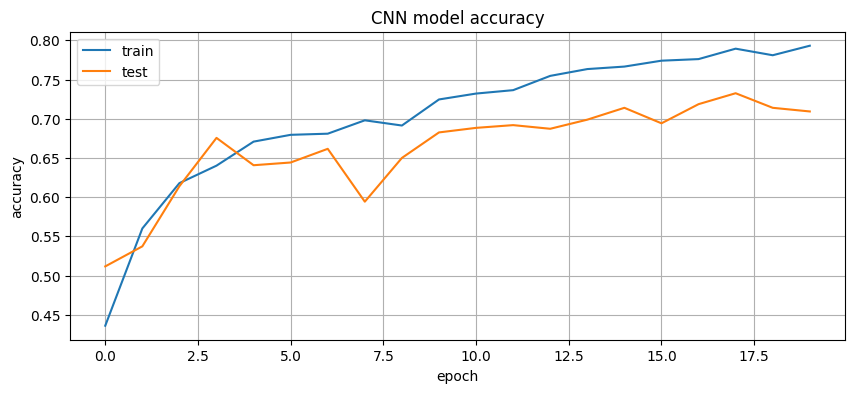

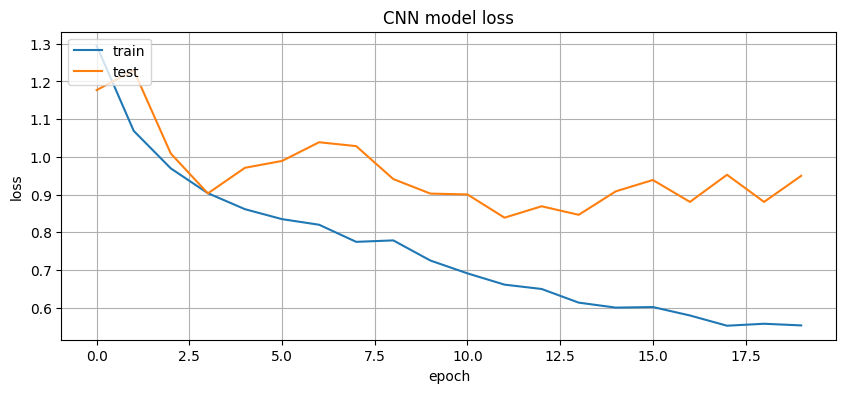

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 34s 256ms/step - loss: 1.1056 - accuracy: 0.5618 - val_loss: 0.7153 - val_accuracy: 0.7407
Epoch 2/20
109/109 [==============================] - 23s 210ms/step - loss: 0.7388 - accuracy: 0.7295 - val_loss: 0.6279 - val_accuracy: 0.7663
Epoch 3/20
109/109 [==============================] - 23s 214ms/step - loss: 0.7249 - accuracy: 0.7394 - val_loss: 0.5863 - val_accuracy: 0.7895
Epoch 4/20
109/109 [==============================] - 24s 216ms/step - loss: 0.6491 - accuracy: 0.7585 - val_loss: 0.5199 - val_accuracy: 0.8128
Epoch 5/20
109/109 [==============================] - 24s 216ms/step - loss: 0.7152 - accuracy: 0.7324 - val_loss: 0.5443 - val_accuracy: 0.8163
Epoch 6/20
109/109 [==============================] - 24s 216ms/step - loss: 0.6298 - accuracy: 0.7718 - val_loss: 0.5348 - val_accuracy: 0.8174
Epoch 7/20
109/109 [==============================] - 23s 209ms/step - loss: 0.6187 - accuracy: 0.7645 - val_loss: 0.6083 - val_ac

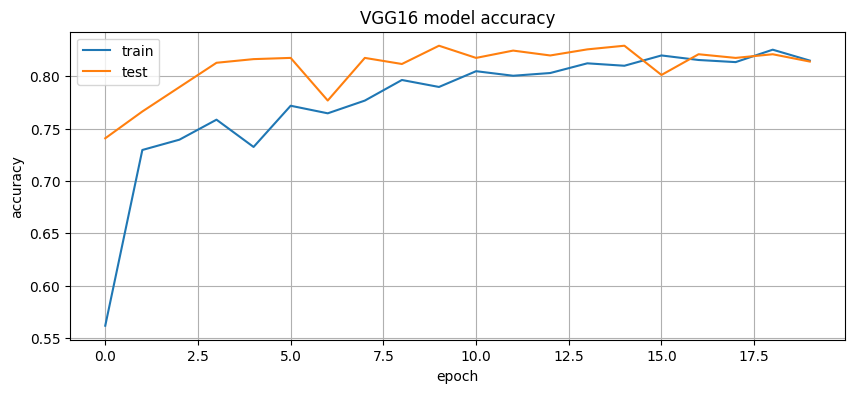

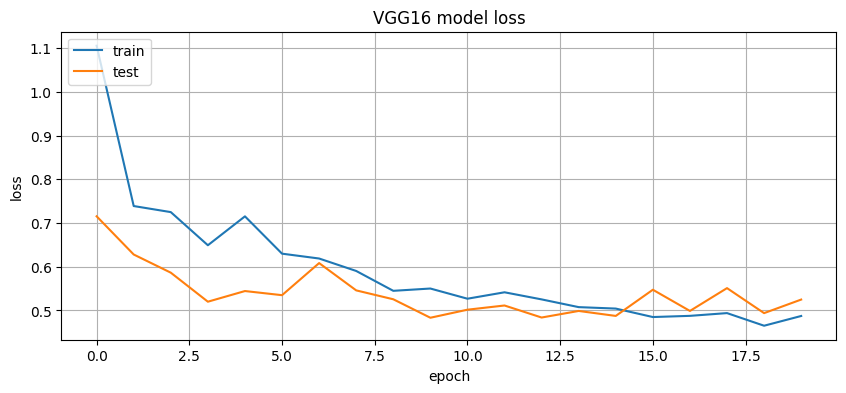

In [ ]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 36s 275ms/step - loss: 1.7030 - accuracy: 0.2774 - val_loss: 1.6723 - val_accuracy: 0.3488
Epoch 2/20
109/109 [==============================] - 24s 216ms/step - loss: 1.5709 - accuracy: 0.3104 - val_loss: 1.5185 - val_accuracy: 0.3419
Epoch 3/20
109/109 [==============================] - 23s 209ms/step - loss: 1.5257 - accuracy: 0.3399 - val_loss: 1.4558 - val_accuracy: 0.3930
Epoch 4/20
109/109 [==============================] - 23s 213ms/step - loss: 1.5562 - accuracy: 0.3115 - val_loss: 1.5066 - val_accuracy: 0.3453
Epoch 5/20
109/109 [==============================] - 23s 212ms/step - loss: 1.5403 - accuracy: 0.3321 - val_loss: 1.4789 - val_accuracy: 0.3977
Epoch 6/20
109/109 [==============================] - 22s 205ms/step - loss: 1.5060 - accuracy: 0.3439 - val_loss: 1.5555 - val_accuracy: 0.3279
Epoch 7/20
109/109 [==============================] - 23s 209ms/step - loss: 1.4879 - accuracy: 0.3575 - val_loss: 1.4424 - val_ac

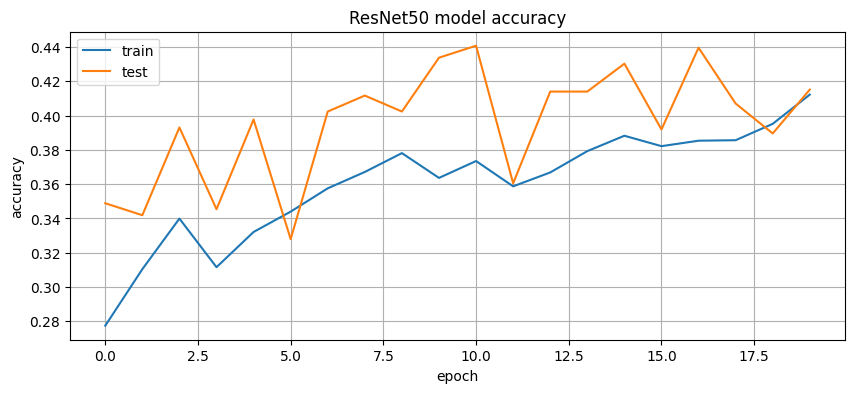

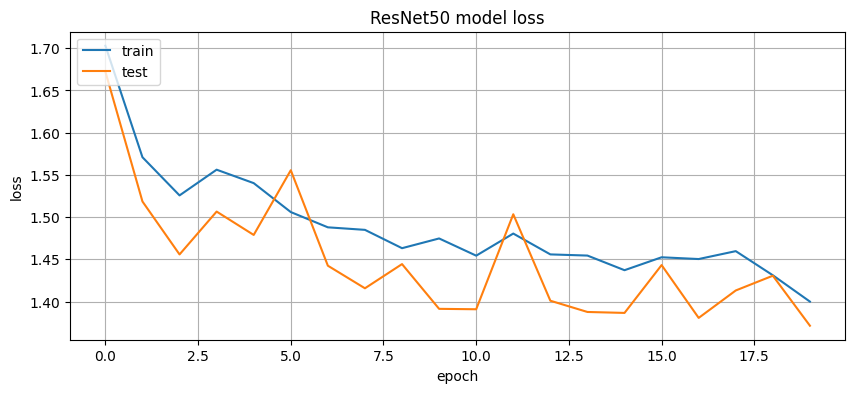

In [ ]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 49s 314ms/step - loss: 0.8757 - accuracy: 0.6671 - val_loss: 0.4919 - val_accuracy: 0.8233
Epoch 2/20
109/109 [==============================] - 25s 232ms/step - loss: 0.4982 - accuracy: 0.8131 - val_loss: 0.4368 - val_accuracy: 0.8477
Epoch 3/20
109/109 [==============================] - 24s 216ms/step - loss: 0.4380 - accuracy: 0.8395 - val_loss: 0.4442 - val_accuracy: 0.8488
Epoch 4/20
109/109 [==============================] - 24s 218ms/step - loss: 0.4012 - accuracy: 0.8533 - val_loss: 0.3922 - val_accuracy: 0.8651
Epoch 5/20
109/109 [==============================] - 24s 216ms/step - loss: 0.3875 - accuracy: 0.8551 - val_loss: 0.4551 - val_accuracy: 0.8419
Epoch 6/20
109/109 [==============================] - 29s 264ms/step - loss: 0.3720 - accuracy: 0.8617 - val_loss: 0.4106 - val_accuracy: 0.8570
Epoch 7/20
109/109 [==============================] - 24s 217ms/step - loss: 0.3721 - accuracy: 0.8588 - val_loss: 0.3845 - val_ac

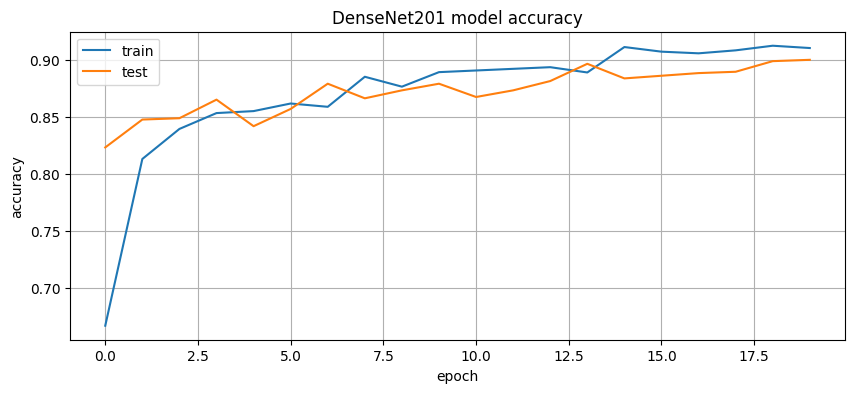

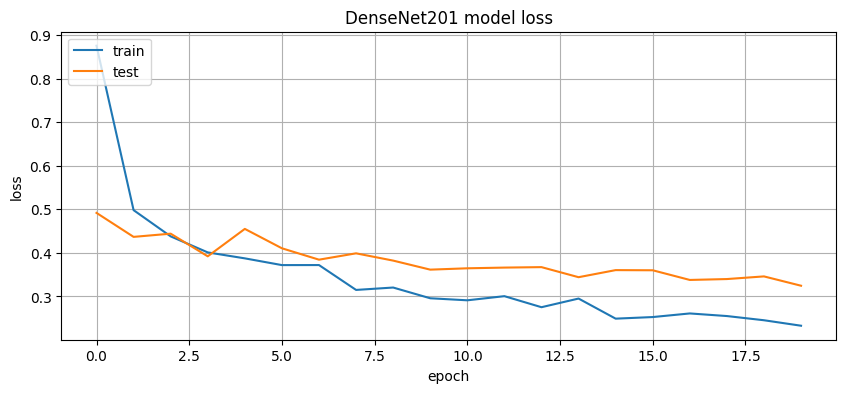

In [ ]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

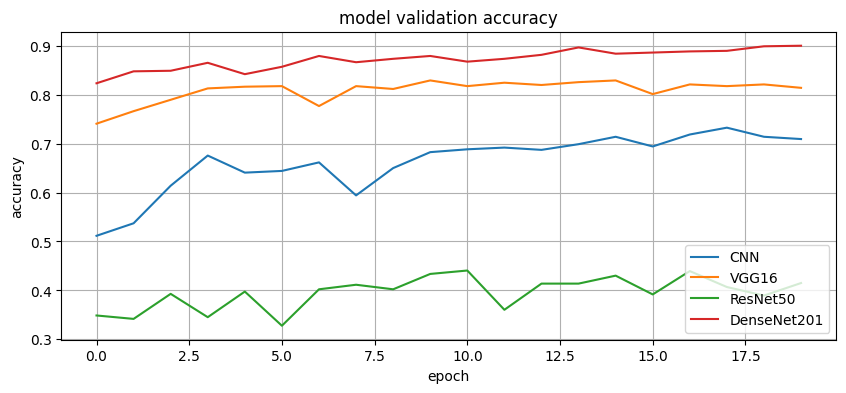

In [ ]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Instal TensorflowJS
!pip install tensorflowjs

In [ ]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

Saving 9538283930_0faea083bb_n.jpg to 9538283930_0faea083bb_n.jpg
1/1 [==============================] - 0s 54ms/step
9538283930_0faea083bb_n.jpg
sunflower


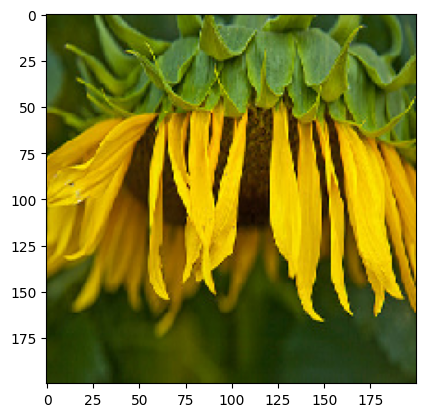

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# File upload
uploaded = files.upload()

for fn in uploaded.keys():
    # Prediksi gambar
    path = fn
    img = image.load_img(path, target_size=IMAGE_SIZE)
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = densenet_model.predict(images, batch_size=BATCH_SIZE)
    classes = np.argmax(classes)

    print(fn)
    if classes == 0:
        print('daisy')
    elif classes == 1:
        print('dandelion')
    elif classes == 2:
        print('rose')
    elif classes == 3:
        print('sunflower')
    else:
        print('tulip')


In [ ]:
densenet_model.save('model-flowers-recognition.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(densenet_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-flowers-recognition.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model-flowers-recognition.h5 /content/modeltfjs